In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Load dataset
file_path = "/content/Bank-Customer-Attrition-Insights-Data.csv"  # Ensure correct file path
df = pd.read_csv(file_path)

# Display dataset info
print("Dataset Info:")
print(df.info())

# Display first few rows
print("\nDataset Head:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int6

In [ ]:
# 1️⃣ Summary Statistics for Key Numerical Variables
num_vars = ['Balance', 'CreditScore', 'Point Earned']  # Update 'Point Earned' if needed
summary_stats = df[num_vars].describe().T  # Mean, Median, Std
summary_stats['Skewness'] = df[num_vars].apply(skew)  # Skewness
summary_stats['Kurtosis'] = df[num_vars].apply(kurtosis)  # Kurtosis
print("\n Summary Statistics:")
print(summary_stats)


 Summary Statistics:
                count          mean           std    min    25%       50%  \
Balance       10000.0  76485.889288  62397.405202    0.0    0.0  97198.54   
CreditScore   10000.0    650.528800     96.653299  350.0  584.0    652.00   
Point Earned  10000.0    606.515100    225.924839  119.0  410.0    605.00   

                    75%        max  Skewness  Kurtosis  
Balance       127644.24  250898.09 -0.141088 -1.489267  
CreditScore      718.00     850.00 -0.071596 -0.426113  
Point Earned     801.00    1000.00  0.008343 -1.193784  


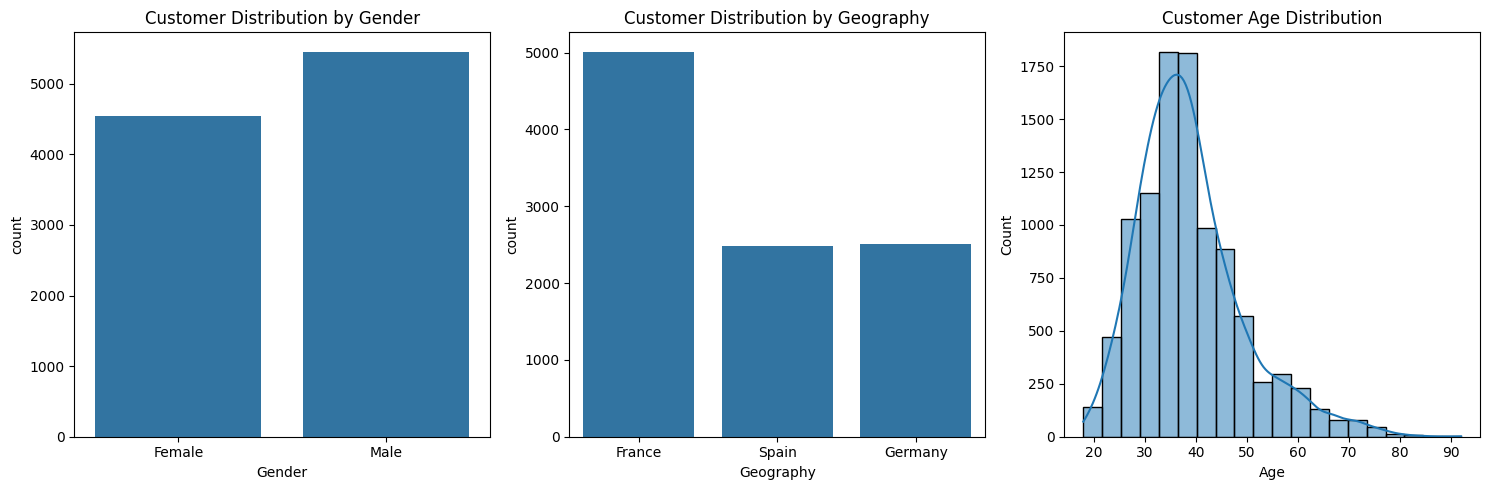

In [ ]:
# 2️⃣ Distribution of Customers by Gender, Geography, and Age
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Gender', data=df)
plt.title("Customer Distribution by Gender")

plt.subplot(1, 3, 2)
sns.countplot(x='Geography', data=df)
plt.title("Customer Distribution by Geography")

plt.subplot(1, 3, 3)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Customer Age Distribution")

plt.tight_layout()
plt.show()


In [ ]:
# 3️⃣ Transaction Counts of Active vs. Inactive Customers
if 'IsActiveMember' in df.columns and 'Point Earned' in df.columns:
    active = df[df['IsActiveMember'] == 1]
    inactive = df[df['IsActiveMember'] == 0] #Fixed: Removed extra indentation

    print("\n Active Customers - Transaction Counts:")
    print(f"Min: {active['Point Earned'].min()}, Max: {active['Point Earned'].max()}, Avg: {active['Point Earned'].mean()}")#Fixed: Removed extra indentation

    print("\n Inactive Customers - Transaction Counts:")
    print(f"Min: {inactive['Point Earned'].min()}, Max: {inactive['Point Earned'].max()}, Avg: {inactive['Point Earned'].mean()}")#Fixed: Removed extra indentation


 Active Customers - Transaction Counts:
Min: 206, Max: 1000, Avg: 605.4228305183459

 Inactive Customers - Transaction Counts:
Min: 119, Max: 1000, Avg: 607.6753969890699


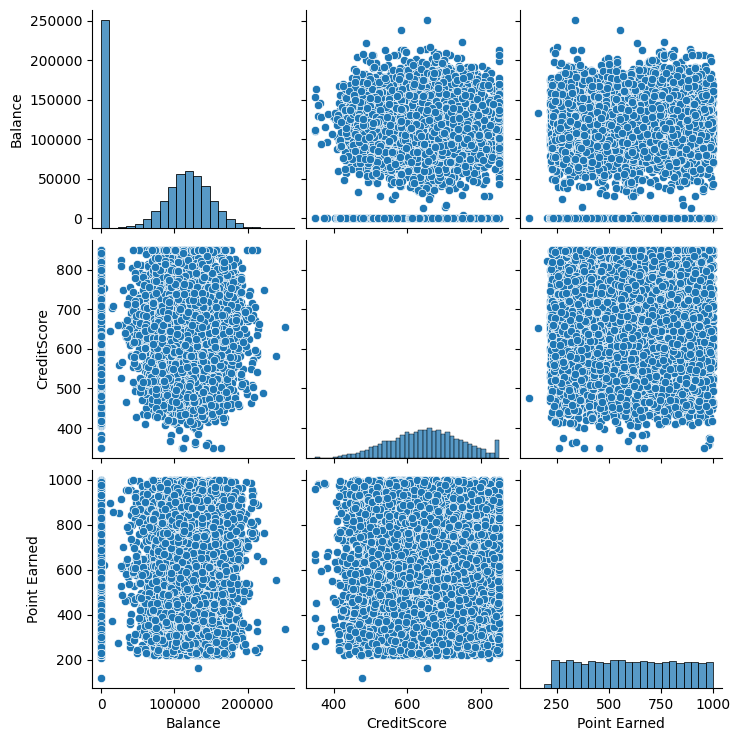

In [ ]:
# 4️⃣ Relationship Between Credit Score, Balance, and Transaction Count
sns.pairplot(df[num_vars])
plt.show()

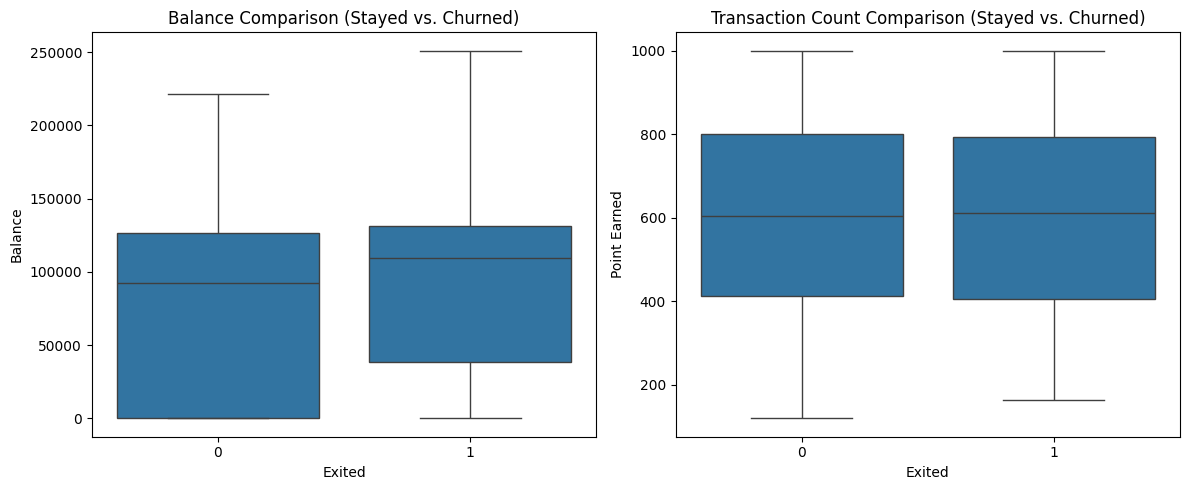

In [ ]:
# 5️⃣ Differences in Balance & Transactions (Churned vs. Stayed)
if 'Exited' in df.columns:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(x='Exited', y='Balance', data=df)
    plt.title("Balance Comparison (Stayed vs. Churned)")

    plt.subplot(1, 2, 2)
    sns.boxplot(x='Exited', y='Point Earned', data=df)
    plt.title("Transaction Count Comparison (Stayed vs. Churned)")

    plt.tight_layout()
    plt.show()

In [ ]:
# 6️⃣ Probability of Low Credit Score & High Balance
credit_threshold = df['CreditScore'].quantile(0.25)  # Bottom 25% as Low Credit Score
balance_threshold = df['Balance'].quantile(0.75)  # Top 25% as High Balance

low_credit_high_balance = df[(df['CreditScore'] <= credit_threshold) & (df['Balance'] >= balance_threshold)]
probability = len(low_credit_high_balance) / len(df)

print(f"\n Probability of Low Credit Score & High Balance: {probability:.4f}")


 Probability of Low Credit Score & High Balance: 0.0638
